## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [33]:
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt

import numpy as np

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree



boston = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv')
X = boston.drop(columns = ['medv']).copy()
y = boston[['medv']]

In [2]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [3]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [5]:
# Dividindo em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Criando a árvore de regressão com profundidade máxima = 8
tree_reg_depth_8 = DecisionTreeRegressor(max_depth=8)
tree_reg_depth_8.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [7]:
# Fazendo previsões no conjunto de treinamento e teste
y_pred_train_depth_8 = tree_reg_depth_8.predict(X_train)
y_pred_test_depth_8 = tree_reg_depth_8.predict(X_test)

In [8]:
# Calculando o MSE para o conjunto de treinamento e teste
mse_train_depth_8 = mean_squared_error(y_train, y_pred_train_depth_8)
mse_test_depth_8 = mean_squared_error(y_test, y_pred_test_depth_8)

print(f'MSE (Treinamento, Profundidade 8): {mse_train_depth_8:.4f}')
print(f'MSE (Teste, Profundidade 8): {mse_test_depth_8:.4f}')

MSE (Treinamento, Profundidade 8): 1.9490
MSE (Teste, Profundidade 8): 9.2986


### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [12]:
path = tree_reg_depth_8.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 3.37683676e-14, 1.23762376e-05, 1.98019802e-04,
        3.09405941e-04, 3.09405941e-04, 4.45544554e-04, 8.91089109e-04,
        1.00247525e-03, 1.23762376e-03, 1.23762376e-03, 1.49752475e-03,
        1.49752475e-03, 1.78217822e-03, 2.00495050e-03, 2.09158416e-03,
        2.23391089e-03, 3.00742574e-03, 5.45792079e-03, 6.54702970e-03,
        1.11386139e-02, 1.16027228e-02, 1.18364961e-02, 1.22297855e-02,
        1.22297855e-02, 1.32626513e-02, 1.88127063e-02, 2.07962046e-02,
        2.17256011e-02, 2.34499450e-02, 2.44018152e-02, 2.45513614e-02,
        2.67337046e-02, 2.69441694e-02, 3.33459060e-02, 3.66893564e-02,
        3.98526752e-02, 4.10086634e-02, 4.33069307e-02, 4.33426155e-02,
        4.74107007e-02, 5.26773927e-02, 5.37304730e-02, 5.82485402e-02,
        6.31703795e-02, 6.65387789e-02, 6.77722772e-02, 6.89306931e-02,
        7.11955961e-02, 7.85940594e-02, 8.20173267e-02, 8.26550670e-02,
        8.42838284e-02, 8.68193878e-02, 9.03564356

Text(0, 0.5, 'Impureza total das folhas')

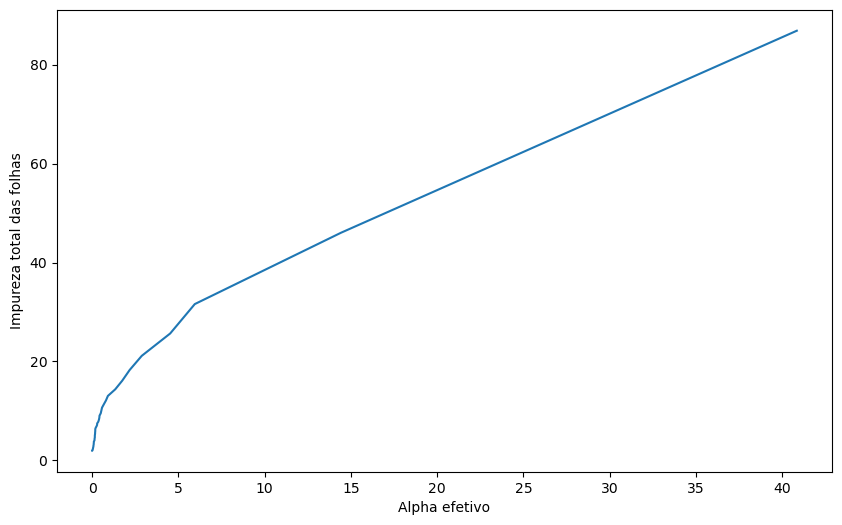

In [13]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [14]:
# Lista para armazenar as árvores
arvores = []

In [15]:
# Itera sobre os CCP-alfas
for ccp_alpha in ccp_alphas:
    # Cria uma árvore com o alpha específico
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)

In [16]:
# Treina a árvore
tree.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=40.853446519164606, random_state=42)

In [17]:
# Adiciona a árvore à lista
arvores.append(tree)

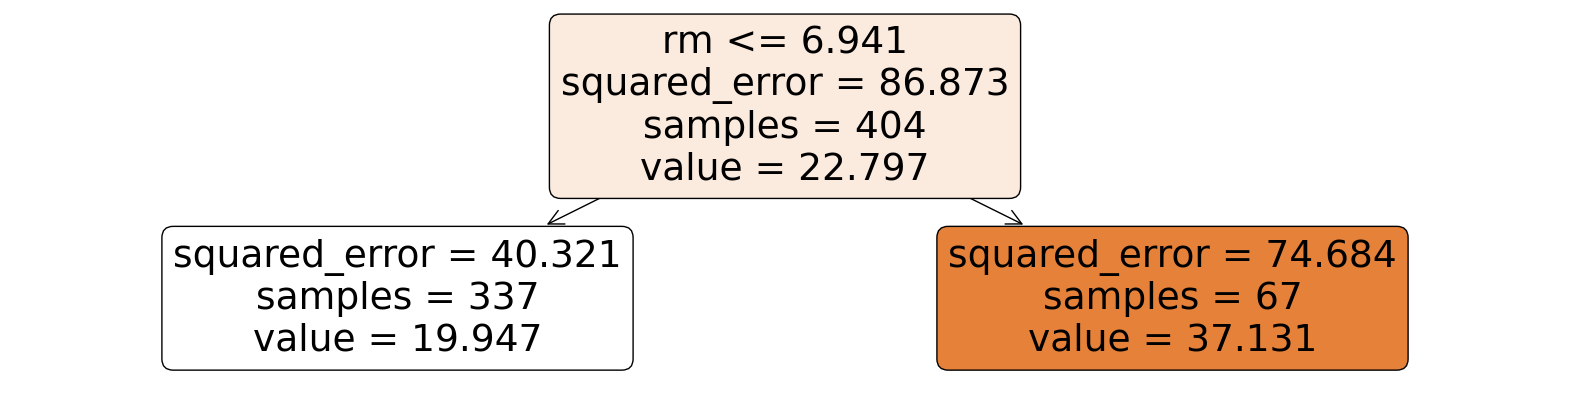

In [19]:
# Visualiza a última árvore (poda completa)
plt.figure(figsize=(20, 5))
plt.title('Última árvore (poda completa)')
plot_tree(arvores[-1], filled=True, feature_names=X.columns.tolist(), rounded=True)
plt.show()

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [20]:
# Lista para armazenar os MSEs
mse_list = []

In [21]:
# Itera sobre as árvores
for tree in arvores:
    # Faz previsões na base de teste
    y_pred = tree.predict(X_test)
    
    # Calcula o MSE e o adiciona à lista
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

In [22]:
# Exibe os MSEs
for i, mse in enumerate(mse_list):
    print(f'Árvore {i + 1}: MSE = {mse}')

Árvore 1: MSE = 46.91780325106487


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

In [29]:
# Lista para armazenar os MSEs
mse_list = []

In [30]:
# Itera sobre os valores de alfa
for alpha in ccp_alphas:
    # Cria uma árvore de decisão com o alfa atual
    tree = DecisionTreeRegressor(ccp_alpha=alpha)
    tree.fit(X_train, y_train)
    
    # Faz previsões na base de teste
    y_pred = tree.predict(X_test)
    
    # Calcula o MSE e o adiciona à lista
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

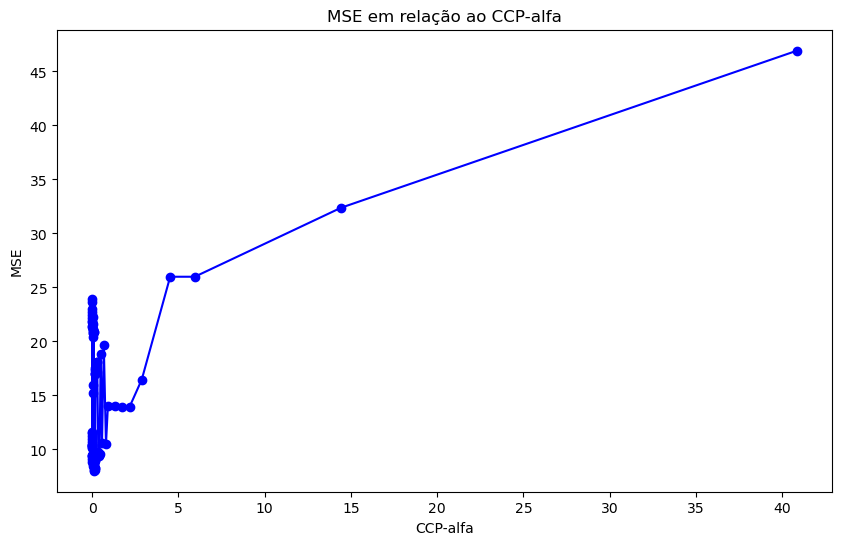

In [31]:
# Plota o gráfico
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_list, marker='o', linestyle='-', color='b')
plt.xlabel('CCP-alfa')
plt.ylabel('MSE')
plt.title('MSE em relação ao CCP-alfa')
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [34]:
# Treina a árvore com o melhor CCP-alfa
best_alpha = ccp_alphas[np.argmin(mse_list)]
final_tree = DecisionTreeRegressor(ccp_alpha=best_alpha)
final_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.09035643564352133)

In [35]:
# Faz previsões na base de teste
y_pred = final_tree.predict(X_test)

In [36]:
# Calcula o R-quadrado
r2 = final_tree.score(X_test, y_test)

print(f"R-quadrado da árvore de decisão: {r2}")

R-quadrado da árvore de decisão: 0.8875388461009075


### 7. Visualize esta árvore.

In [40]:
# Converte o Index para uma lista
feature_names_list = list(X.columns)

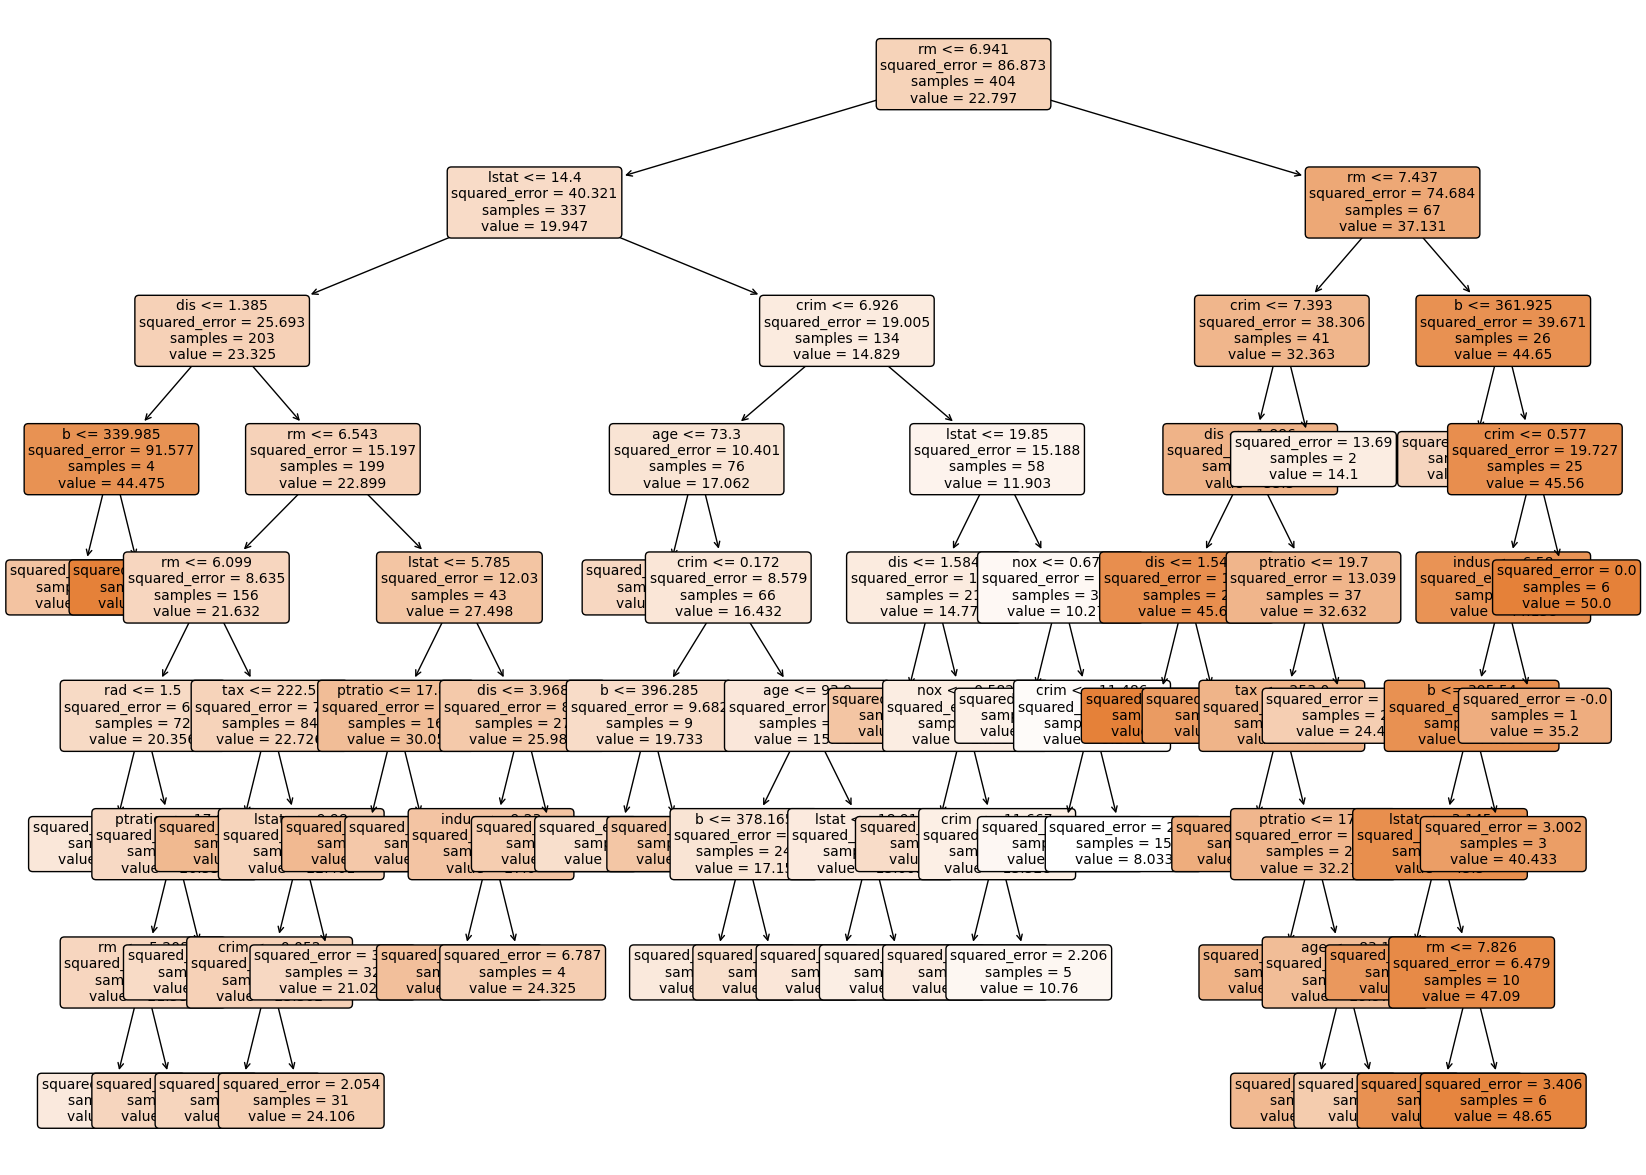

In [41]:
# Visualiza a árvore final com profundidade de 8 níveis
plt.figure(figsize=(20, 15))
plot_tree(final_tree, filled=True, feature_names=feature_names_list, rounded=True, fontsize=10, max_depth=8)
plt.show()